# Unit 1 Capstone

The data I am exploring today comes to us from https://www.kaggle.com/egrinstein/20-years-of-games. It is a featured dataset. Eric Grinstein gathered together 20 years worth of IGN video game reviews in 2016. IGN is an American video game and entertainment media company. They have been providing game reviews and walk through guides since their founding in September 1996. 

In [2]:
import numpy as np   # Set up working environment
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
from scipy import stats
import decimal
from datetime import datetime 
from collections import Counter
%matplotlib inline 

In [37]:
ign_df = pd.read_csv('/Users/Beba/Documents/JupyterNotebooks/ign.csv')
ign_df.head()

,Unnamed: 0,score_phrase,title,url,platform,score,genre,editors_choice,release_year,release_month,release_day
0,0,Amazing,LittleBigPlanet PS Vita,/games/littlebigplanet-vita/vita-98907,PlayStation Vita,9.0,Platformer,Y,2012,9,12
1,1,Amazing,LittleBigPlanet PS Vita -- Marvel Super Hero E...,/games/littlebigplanet-ps-vita-marvel-super-he...,PlayStation Vita,9.0,Platformer,Y,2012,9,12
2,2,Great,Splice: Tree of Life,/games/splice/ipad-141070,iPad,8.5,Puzzle,N,2012,9,12
3,3,Great,NHL 13,/games/nhl-13/xbox-360-128182,Xbox 360,8.5,Sports,N,2012,9,11
4,4,Great,NHL 13,/games/nhl-13/ps3-128181,PlayStation 3,8.5,Sports,N,2012,9,11


In [38]:
ign_df.describe() # quick peek at the max and mins

,Unnamed: 0,score,release_year,release_month,release_day
count,18625.000000,18625.000000,18625.000000,18625.00000,18625.000000
mean,9312.000000,6.950459,2006.515329,7.13847,15.603866
std,5376.718717,1.711736,4.587529,3.47671,8.690128
min,0.000000,0.500000,1970.000000,1.00000,1.000000
25%,4656.000000,6.000000,2003.000000,4.00000,8.000000
50%,9312.000000,7.300000,2007.000000,8.00000,16.000000
75%,13968.000000,8.200000,2010.000000,10.00000,23.000000
max,18624.000000,10.000000,2016.000000,12.00000,31.000000


In [39]:
ign_df.drop(516, axis=0, inplace=True) # get rid of 1970 value

In [46]:
ign_df.drop(ign_df[['Unnamed: 0', 'score_phrase', 'url']], axis=1, inplace=True)

In [56]:
ign_df['second_genre'] = ign_df['genre'].str.partition(', ')
# cleaning up the genres

In [57]:
ign_df.head()

,title,platform,score,genre,editors_choice,release_year,release_month,release_day,second_genre
0,LittleBigPlanet PS Vita,PlayStation Vita,9.0,Platformer,Y,2012,9,12,Platformer
1,LittleBigPlanet PS Vita -- Marvel Super Hero E...,PlayStation Vita,9.0,Platformer,Y,2012,9,12,Platformer
2,Splice: Tree of Life,iPad,8.5,Puzzle,N,2012,9,12,Puzzle
3,NHL 13,Xbox 360,8.5,Sports,N,2012,9,11,Sports
4,NHL 13,PlayStation 3,8.5,Sports,N,2012,9,11,Sports


In [58]:
print(ign_df['release_year'].min()) # check it worked

1996


In [60]:
ign_df.groupby(ign_df['second_genre']).title.count().sort_values(ascending=False) # much better

second_genre
Action          5019
Sports          2183
Shooter         1640
Racing          1470
Adventure       1199
Strategy        1150
Puzzle          1040
RPG              995
Platformer       842
Fighting         647
Simulation       568
Music            422
Flight           189
Card             174
Party            141
Wrestling        135
Board            123
Trivia           119
Hunting          115
Virtual Pet       82
Pinball           78
Educational       69
Compilation       57
Productivity      41
Battle            32
Casino            31
Other             22
Hardware           2
Adult              2
Baseball           1
Name: title, dtype: int64

That's better for the genres but there is still a little room for improvement.

In [61]:
len(ign_df.second_genre.unique())

31

In [178]:
replace = ('Baseball', 'Adult', 'Hardware', 'Casino', 'Battle', 'Productivity', 'NaN')
ign_df.replace(to_replace=replace, value='Other', inplace=True)

In [70]:
ign_df.groupby(ign_df['second_genre']).title.count().sort_values(ascending=False) # much better

second_genre
Action         5019
Sports         2183
Shooter        1640
Racing         1470
Adventure      1199
Strategy       1150
Puzzle         1040
RPG             995
Platformer      842
Fighting        647
Simulation      568
Music           422
Flight          189
Card            174
Party           141
Wrestling       135
Other           131
Board           123
Trivia          119
Hunting         115
Virtual Pet      82
Pinball          78
Educational      69
Compilation      57
Name: title, dtype: int64

In [262]:
ign_df.second_genre.dropna(axis=0, how='any', inplace=True)

In [288]:
ign_df.second_genre.fillna({'':'Other'}) ;

In [316]:
ign_df.to_csv('working_ign.csv') # export the updated dataframe

With the data checked and tidied up, we are ready to take a look at some graphs. First up, histograms. I wanted to see what the density of the releases look like over the years. And then I added the months and days of the week to see what sort of patterns might be there too. 

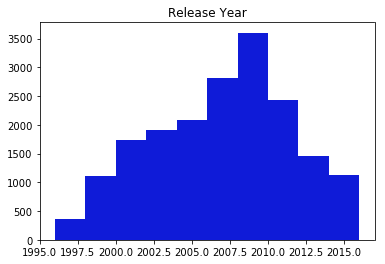

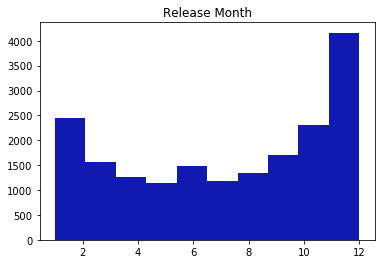

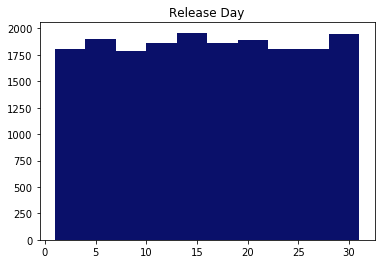

In [7]:
plt.hist(ign_df['release_year'], color='#0F1BD8') # counts of releases per year
plt.title('Release Year')
plt.show()

plt.hist(ign_df['release_month'], color='#101AB0') # releases per month, no surpsises
plt.title('Release Month')
plt.show()

plt.hist(ign_df['release_day'], color='#0A106A') # just for fun
plt.title('Release Day')
plt.show()


So with these histograms we see a few things. First off, 2008 and 2009 were a mad house for game releases that were reviewed by IGN but those counts have been steadily falling since. Looking at monthly releases, November dominates for new game releases. That could be driven by a pursuit of xmas sales. Another spike in July coincides with the American school system closing for the summer. The release pattern for days of the month shows a very subtle wave form.

Digging in deeper, let's take a look at what kinds of games are being made and which ones are getting the Editor's Choice recommendation.

In [21]:
ign_df['genre'].groupby(ign_df['editors_choice']).count() # look at editors choice

editors_choice
N    15073
Y     3515
Name: genre, dtype: int64

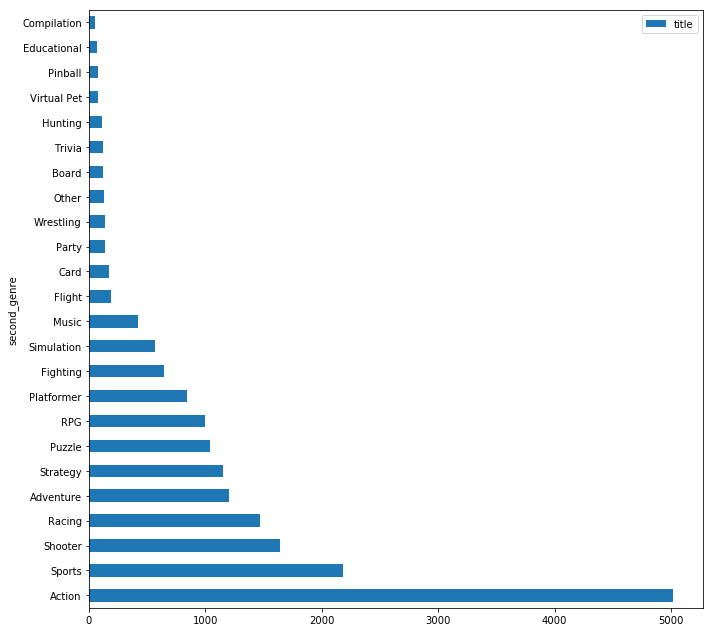

In [72]:
# checking out genre counts for whole data frame
            
ign_df.groupby(['second_genre']).title.count().sort_values(ascending=False).plot(kind='barh',
                                                    figsize=[11,11],
                                                    legend=True)

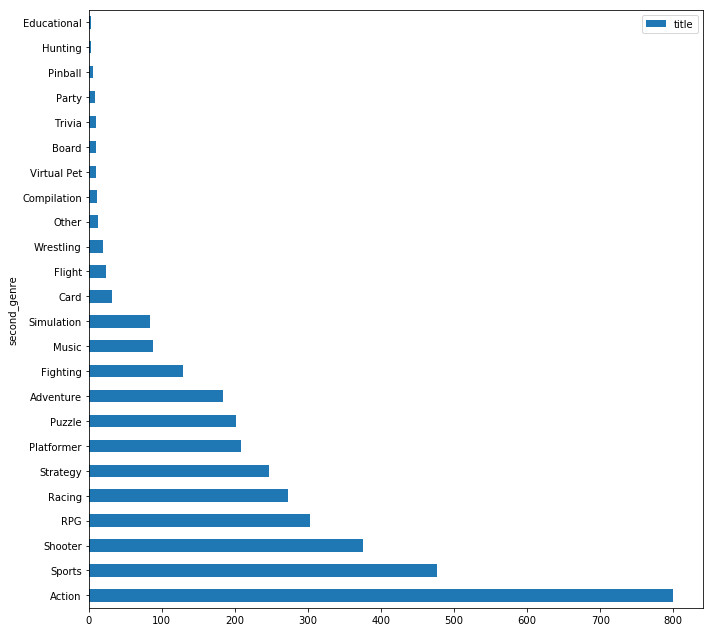

In [73]:
editors_choice = ign_df[ign_df.editors_choice == 'Y']

editors_choice.groupby(['second_genre']).title.count().sort_values(ascending=False).plot(kind='barh',
                                                            figsize=[11,11],
                                                            legend=True)
# checking out genre ratios for editors choice

Looking at the graphs for the title counts for the whole data frame, we can see that 'Action' is a huge genre with far more titles in it than the next most populous genre, 'Sports'. Within Editor's Choice games, we see that while 'Action' is the largest share of games, it does not have as large a lead against the other genres as it does in the general population. Let's compare the scores for the top 3 Editor's Choice genres and see if there is a relationship between genre and score. 

Our hypothesis is that within the Editors Choice, there is some kind of relationship between score and genre. Our null hypothesis is that there is NO relationship between genre and score within the Editor's Choice, and the mean scores for each group will not be significantly different. Our p-value threshold will be .05.

First up, Action vs Sports genres.

In [314]:
action = editors_choice[editors_choice['second_genre'] == 'Action']['score']
shooter = editors_choice[editors_choice['second_genre'] == 'Shooter']['score']
sports = editors_choice[editors_choice['second_genre'] == 'Sports']['score']

sp.stats.ttest_ind(action, sports)

Ttest_indResult(statistic=2.3417187512573148, pvalue=0.01934846553789955)

Next up, Action vs Shooter.

In [313]:
sp.stats.ttest_ind(action, shooter)

Ttest_indResult(statistic=-1.6111513289556953, pvalue=0.10741577039263325)

And finally, Shooter vs Sports.

In [315]:
sp.stats.ttest_ind(shooter, sports)

Ttest_indResult(statistic=3.943448398918532, pvalue=8.6933199711840506e-05)

Two of these t-tests support rejecting the null hypothesis that there is no relationship between genre and score. These results support more investigation into the scores of each game, with their genres in mind as a contributing factor. 

Problem: How to prevent unconcious bias in game reviews? 

Preference for a certain genre can lead game reviewers to give lower over all scores to games that are NOT in their personally preferred genre, possibly unfairly evaluating those games. Action games are by far the most populous genre, for all platforms, but their % of market share is lower in the Editors Choice games.

Potential solution: Having game reviewers review games that are NOT in their favorite game genres will decrease unfair scoring.(No rose colored glasses.)

Method for testing: 
To determine if reviewers are using biased evaluations for their preferred genre of games, we will split the reviewers into two groups. The control group will continue to get games assigned as they normally do. The test group will get games assigned to them that coincide with their preferred genres for 3 months, then that do NOT coincide for 3 months. Each reviewer will complete a survey on demographic information and game genre and platform preferences. At the end of the 6 months, we will compare the scores given for preferred vs non-preferred games, and also compare those games scores to the scores given by the control group. 

If the preferred game genres garner scores 10% higher compared to the control group, reveiwers should no longer review games that are in their preferred genre. 

If no difference is seen, conclude there is no bias in the reviewing process.